In [181]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

import seaborn as sns
import warnings

# **Twitter**

# *KNN Vecinos*

In [182]:
df = pd.read_csv("Twitter.csv")

In [183]:
characteristics = ['dia_mas_publica', 'perfil_privado', 'cantidad_seguidores']
X = df.filter(items=characteristics).copy()

In [184]:
classColumn = ['clase']
y = df.filter(items=classColumn).copy()

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador KNN:", accuracy)

Precisión del clasificador KNN: 0.6966292134831461


<Axes: >

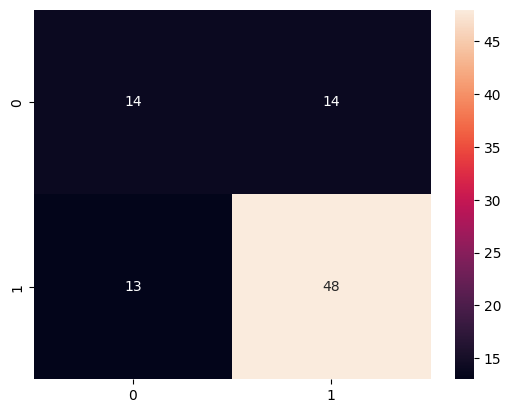

In [185]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [186]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fake       0.52      0.50      0.51        28
        Real       0.77      0.79      0.78        61

    accuracy                           0.70        89
   macro avg       0.65      0.64      0.64        89
weighted avg       0.69      0.70      0.70        89



# *Bayes Ingenuo*

In [190]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

nb = CategoricalNB()

nb.fit(X_train2, y_train2)

y_pred2 = nb.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
print("Precisión del clasificador Bayes Ingenuo:", accuracy)

Precisión del clasificador Bayes Ingenuo: 0.7191011235955056


In [191]:
print(df.filter(items=['dia_mas_publica', 'perfil_privado', 'cantidad_seguidores']))

      dia_mas_publica perfil_privado cantidad_seguidores
0       Fin de semana             No                bajo
1    Inicio de semana             No                bajo
2    Inicio de semana             No                bajo
3    Inicio de semana             No                bajo
4    Inicio de semana             No                bajo
..                ...            ...                 ...
289     Fin de semana             No                bajo
290     Fin de semana             No                bajo
291      Media semana             No                bajo
292     Fin de semana             No               medio
293      Media semana             No               medio

[294 rows x 3 columns]


In [193]:
import pickle

df = pd.read_csv("Twitter.csv")

df = df.drop(columns=['Unnamed: 0'])

encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(df.filter(items=['dia_mas_publica', 'perfil_privado', 'cantidad_seguidores']))

dato_prueba = np.array(['Fin de semana', 'No', 'bajo'])  # Dato categórico a codificar

# Reshape del dato de prueba
dato_prueba_reshape = dato_prueba.reshape(1, -1)

# Transformar el dato de prueba
dato_prueba_encoded = encoder.transform(dato_prueba_reshape)

# Imprimir el dato codificado
print(dato_prueba_encoded)


# Its important to use binary mode 
knnPickle = open('TwitterFinal', 'wb')

# source, destination 
pickle.dump(nb, knnPickle)  

# close the file
knnPickle.close()

loaded_model = pickle.load(open('TwitterFinal', 'rb'))
print(dato_prueba_encoded)
result = loaded_model.predict(np.array(dato_prueba_encoded).reshape(1, -1)) 
print(result)

[[1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]]
[[1. 0. 0. 0. 1. 0. 0. 1. 0. 0.]]
['Fake']


<Axes: >

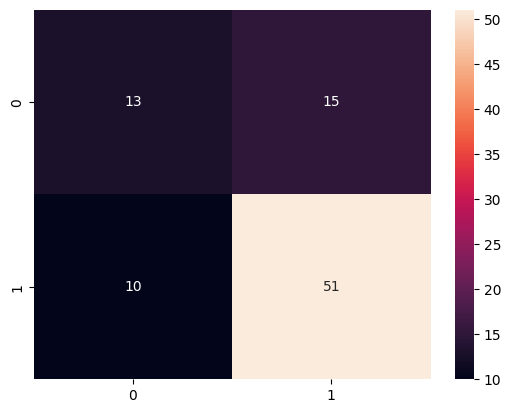

In [194]:
import seaborn as sns

cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True)

In [195]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

        Fake       0.57      0.46      0.51        28
        Real       0.77      0.84      0.80        61

    accuracy                           0.72        89
   macro avg       0.67      0.65      0.66        89
weighted avg       0.71      0.72      0.71        89



# *K-fold*

In [196]:
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=2)
y1 = y.values

X_encoded = encoder.fit_transform(X)
for i , (train_index, test_index) in enumerate(kf.split(X_encoded,y1)):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Precisión del clasificador KNN:", accuracy)

              precision    recall  f1-score   support

        Fake       0.37      0.58      0.45        12
        Real       0.88      0.74      0.80        47

    accuracy                           0.71        59
   macro avg       0.62      0.66      0.63        59
weighted avg       0.77      0.71      0.73        59

Precisión del clasificador KNN: 0.711864406779661
              precision    recall  f1-score   support

        Fake       0.52      0.68      0.59        22
        Real       0.77      0.62      0.69        37

    accuracy                           0.64        59
   macro avg       0.64      0.65      0.64        59
weighted avg       0.67      0.64      0.65        59

Precisión del clasificador KNN: 0.6440677966101694
              precision    recall  f1-score   support

        Fake       0.39      0.56      0.46        16
        Real       0.81      0.67      0.73        43

    accuracy                           0.64        59
   macro avg       0.60    

In [197]:
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=2)
y1 = y.values

X_encoded = encoder.fit_transform(X)
for i , (train_index, test_index) in enumerate(kf.split(X_encoded,y1)):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    print(X_train.shape[0], X_test.shape[0])

    nb = CategoricalNB()
    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Precisión del clasificador Bayes Ingenuo:", accuracy)

235 59
              precision    recall  f1-score   support

        Fake       0.40      0.33      0.36        12
        Real       0.84      0.87      0.85        47

    accuracy                           0.76        59
   macro avg       0.62      0.60      0.61        59
weighted avg       0.75      0.76      0.75        59

Precisión del clasificador Bayes Ingenuo: 0.7627118644067796
235 59
              precision    recall  f1-score   support

        Fake       0.50      0.64      0.56        22
        Real       0.74      0.62      0.68        37

    accuracy                           0.63        59
   macro avg       0.62      0.63      0.62        59
weighted avg       0.65      0.63      0.63        59

Precisión del clasificador Bayes Ingenuo: 0.6271186440677966
235 59
              precision    recall  f1-score   support

        Fake       0.60      0.38      0.46        16
        Real       0.80      0.91      0.85        43

    accuracy                           

# **Facebook**

# *KNN Vecinos*

In [198]:
df = pd.read_csv("Facebook.csv")
df.head()

,Unnamed: 0,caracteres_nombre,foto_perfil,num_amigos,dias_mas_Publicaciones,paginas_que_sigue,Clase
0,0,corto,Sí,medio,fin de semana,pocas,T
1,1,medio,Sí,medio,fin de semana,pocas,T
2,2,medio,Sí,medio,fin de semana,pocas,T
3,3,corto,Sí,medio,fin de semana,pocas,T
4,4,corto,Sí,medio,media semana,pocas,T


In [199]:
#Dropear Carrera

df = pd.read_csv("Facebook.csv")

df = df.drop(columns=['Unnamed: 0'])
df.tail()


headers = df.columns
print(headers)

import warnings
warnings.filterwarnings('ignore')


best_accuracy = 0
best_characteristics = []
best_model = []
best_cm = []

for header1 in headers:
    for header2 in headers:
        for header3 in headers:
            if((header1 != header2) and (header1 != header3) and (header2 != header3) and (header1 != 'Clase') and (header2 != 'Clase') and (header3 != 'Clase')):
                characteristics = [header1, header2, header3]
                
                X = df.filter(items=characteristics).copy()
                classColumn = ['Clase']
                y = df.filter(items=classColumn).copy()

                encoder = OneHotEncoder(sparse=False)
                X_encoded = encoder.fit_transform(X)

                X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

                knn = KNeighborsClassifier(n_neighbors=3)

                knn.fit(X_train, y_train)
                #nb = CategoricalNB()
                #nb.fit(X_train, y_train)

                y_pred = knn.predict(X_test)


                accuracy = accuracy_score(y_test, y_pred)
                if(accuracy > best_accuracy):
                    best_accuracy = accuracy
                    best_characteristics = characteristics
                    best_model = nb
                    best_encoder = encoder
                    best_X = X
                    print(best_accuracy, best_characteristics)

                    cm = confusion_matrix(y_test, y_pred)
                    best_cm = cm
                    print(cm)
                    

                #print("Precisión del clasificador KNN:", accuracy)

Index(['caracteres_nombre', 'foto_perfil', 'num_amigos',
       'dias_mas_Publicaciones', 'paginas_que_sigue', 'Clase'],
      dtype='object')
0.7247706422018348 ['caracteres_nombre', 'foto_perfil', 'num_amigos']
[[16 17]
 [13 63]]
0.8256880733944955 ['caracteres_nombre', 'num_amigos', 'dias_mas_Publicaciones']
[[17 16]
 [ 3 73]]
0.8440366972477065 ['num_amigos', 'caracteres_nombre', 'dias_mas_Publicaciones']
[[17 16]
 [ 1 75]]
0.8532110091743119 ['dias_mas_Publicaciones', 'num_amigos', 'paginas_que_sigue']
[[21 12]
 [ 4 72]]


In [200]:
print(df.filter(items=best_characteristics).copy())

    dias_mas_Publicaciones num_amigos paginas_que_sigue
0            fin de semana      medio             pocas
1            fin de semana      medio             pocas
2            fin de semana      medio             pocas
3            fin de semana      medio             pocas
4             media semana      medio             pocas
..                     ...        ...               ...
356          fin de semana      medio           algunas
357                ninguno       bajo             pocas
358                ninguno       bajo             pocas
359                ninguno       alto             pocas
360                ninguno      medio             pocas

[361 rows x 3 columns]


In [201]:
import pickle

df = pd.read_csv("Facebook.csv")

df = df.drop(columns=['Unnamed: 0'])

encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(df.filter(items=best_characteristics))

dato_prueba = np.array(['fin de semana', 'medio', 'pocas'])  # Dato categórico a codificar

# Reshape del dato de prueba
dato_prueba_reshape = dato_prueba.reshape(1, -1)

# Transformar el dato de prueba
dato_prueba_encoded = encoder.transform(dato_prueba_reshape)

# Imprimir el dato codificado
print(dato_prueba_encoded)


# Its important to use binary mode 
knnPickle = open('Facebook85', 'wb')

# source, destination 
pickle.dump(best_model, knnPickle)  

# close the file
knnPickle.close()

loaded_model = pickle.load(open('Facebook85', 'rb'))
print(dato_prueba_encoded)
result = loaded_model.predict(np.array(dato_prueba_encoded).reshape(1, -1)) 
print(result)

[[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]]


ValueError: X has 14 features, but CategoricalNB is expecting 10 features as input.

In [202]:
characteristics = ['num_amigos', 'dias_mas_Publicaciones', 'paginas_que_sigue']
X = df.filter(items=characteristics).copy()

In [203]:
classColumn = ['Clase']
y = df.filter(items=classColumn).copy()

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

print(X_train.shape[0], X_test.shape[0])

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador KNN:", accuracy)

252 109
Precisión del clasificador KNN: 0.8348623853211009


<Axes: >

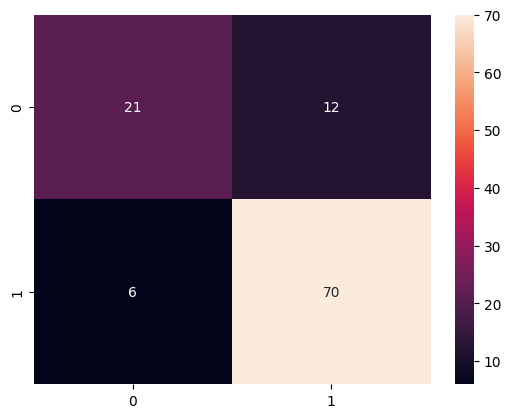

In [204]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [205]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           F       0.78      0.64      0.70        33
           T       0.85      0.92      0.89        76

    accuracy                           0.83       109
   macro avg       0.82      0.78      0.79       109
weighted avg       0.83      0.83      0.83       109



# *Bayes Ingenuo*

In [206]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

print(X_train2.shape[0], X_test2.shape[0])

nb = CategoricalNB()

nb.fit(X_train2, y_train2)

y_pred2 = nb.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
print("Precisión del clasificador Bayes Ingenuo:", accuracy)

216 145
Precisión del clasificador Bayes Ingenuo: 0.7655172413793103


In [207]:
print(df.filter(items=['num_amigos', 'dias_mas_Publicaciones', 'paginas_que_sigue']))

    num_amigos dias_mas_Publicaciones paginas_que_sigue
0        medio          fin de semana             pocas
1        medio          fin de semana             pocas
2        medio          fin de semana             pocas
3        medio          fin de semana             pocas
4        medio           media semana             pocas
..         ...                    ...               ...
356      medio          fin de semana           algunas
357       bajo                ninguno             pocas
358       bajo                ninguno             pocas
359       alto                ninguno             pocas
360      medio                ninguno             pocas

[361 rows x 3 columns]


In [208]:
import pickle

df = pd.read_csv("Facebook.csv")

df = df.drop(columns=['Unnamed: 0'])

encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(df.filter(items=['num_amigos', 'dias_mas_Publicaciones', 'paginas_que_sigue']))

dato_prueba = np.array(['medio', 'fin de semana', 'pocas'])  # Dato categórico a codificar

# Reshape del dato de prueba
dato_prueba_reshape = dato_prueba.reshape(1, -1)

# Transformar el dato de prueba
dato_prueba_encoded = encoder.transform(dato_prueba_reshape)

# Imprimir el dato codificado
print(dato_prueba_encoded)


# Its important to use binary mode 
knnPickle = open('FacebookFinal', 'wb')

# source, destination 
pickle.dump(nb, knnPickle)  

# close the file
knnPickle.close()

loaded_model = pickle.load(open('FacebookFinal', 'rb'))
print(dato_prueba_encoded)
result = loaded_model.predict(np.array(dato_prueba_encoded).reshape(1, -1)) 
print(result)

[[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
['T']


<Axes: >

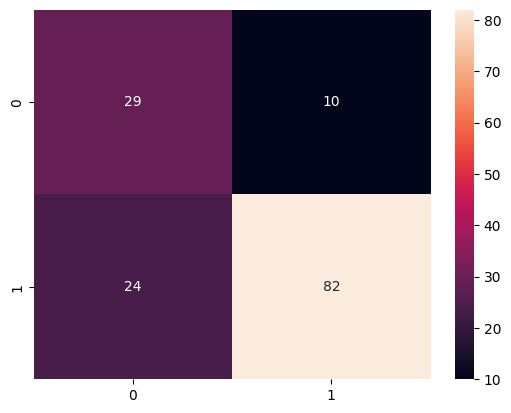

In [209]:
import seaborn as sns

cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True)

In [210]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           F       0.55      0.74      0.63        39
           T       0.89      0.77      0.83       106

    accuracy                           0.77       145
   macro avg       0.72      0.76      0.73       145
weighted avg       0.80      0.77      0.78       145



# *K-fold*

In [211]:
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=2)
y1 = y.values

X_encoded = encoder.fit_transform(X)
for i , (train_index, test_index) in enumerate(kf.split(X_encoded,y1)):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Precisión del clasificador KNN:", accuracy)

              precision    recall  f1-score   support

           F       0.00      0.00      0.00        16
           T       0.77      0.95      0.85        57

    accuracy                           0.74        73
   macro avg       0.39      0.47      0.43        73
weighted avg       0.60      0.74      0.66        73

Precisión del clasificador KNN: 0.7397260273972602
              precision    recall  f1-score   support

           F       0.45      0.39      0.42        23
           T       0.73      0.78      0.75        49

    accuracy                           0.65        72
   macro avg       0.59      0.58      0.59        72
weighted avg       0.64      0.65      0.65        72

Precisión del clasificador KNN: 0.6527777777777778
              precision    recall  f1-score   support

           F       0.25      0.28      0.26        18
           T       0.75      0.72      0.74        54

    accuracy                           0.61        72
   macro avg       0.50   

In [212]:
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=2)
y1 = y.values

X_encoded = encoder.fit_transform(X)
for i , (train_index, test_index) in enumerate(kf.split(X_encoded,y1)):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

    print(X_train.shape[0], X_test.shape[0])

    nb = CategoricalNB()
    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Precisión del clasificador Bayes Ingenuo:", accuracy)

288 73
              precision    recall  f1-score   support

           F       0.41      0.69      0.51        16
           T       0.89      0.72      0.80        57

    accuracy                           0.71        73
   macro avg       0.65      0.70      0.65        73
weighted avg       0.79      0.71      0.73        73

Precisión del clasificador Bayes Ingenuo: 0.7123287671232876
289 72
              precision    recall  f1-score   support

           F       0.50      0.35      0.41        23
           T       0.73      0.84      0.78        49

    accuracy                           0.68        72
   macro avg       0.62      0.59      0.60        72
weighted avg       0.66      0.68      0.66        72

Precisión del clasificador Bayes Ingenuo: 0.6805555555555556
289 72
              precision    recall  f1-score   support

           F       0.52      0.72      0.60        18
           T       0.89      0.78      0.83        54

    accuracy                           

# **Perfiles**

In [228]:
df = pd.read_csv("ReconocimientoPerfiles.csv")
df.head()

,Unnamed: 0,Edad,Genero,Tutor,Vive-con-Familia,Enfermedad-CrÃ³nica,Promedio-Preparatoria,Materias-Relacionadas,Carrera-Elegida-Ajusta-A-Gustos-Habilidades,Buena-RelaciÃ³n-Familiar,...,Noviazgo,Actividad-Cultural-o-Deportiva,Tiempo-con-sus-amigos-compaÃ±eros,Horas-Semana-Divertirse con-sus-amigos,ConsumÃ­a-Alcohol-Entre-semana,ConsumÃ­a-Alcohol-Fin-semana,Horas-DÃ­a-Dedicada-Redes-Sociales,Gustan-Videojuegos,Horas-Semana-Dedicada-Videojuegos,Horas-Semana-Dedicada-Actividades-Entretenimiento
0,0,señor,Masculino,Madre,No,No,bueno,Sí,Sí,No,...,No,No,No,baja,nunca,nunca,<1,No,0,1-3
1,1,joven,Masculino,Madre,Sí,No,bueno,No,Sí,Sí,...,Sí,Sí,Sí,media,casi-nunca,a veces,>2,Sí,>3,1-3
2,2,joven,Masculino,Padre,Sí,No,regular,No,Sí,Sí,...,Sí,No,Sí,baja,casi-nunca,casi-nunca,1-2,Sí,1-3,1-3
3,3,joven,Masculino,Madre,No,No,bueno,Sí,No,Sí,...,No,Sí,Sí,baja,a veces,regularmente,1-2,No,0,1-3
4,4,joven,Masculino,Madre,Sí,No,regular,No,No,No,...,Sí,No,No,baja,nunca,casi-nunca,1-2,Sí,>3,>3


In [229]:
cantidad_elementos = df['Promedio-Primer-Semestre'].value_counts()
print(cantidad_elementos)
df = df.drop(columns=['Unnamed: 0'])

bueno      68
regular    67
malo        7
Name: Promedio-Primer-Semestre, dtype: int64


In [215]:
headers = df.columns
print(headers)

Index(['Edad', 'Genero', 'Tutor', 'Vive-con-Familia', 'Enfermedad-CrÃ³nica',
       'Promedio-Preparatoria', 'Materias-Relacionadas',
       'Carrera-Elegida-Ajusta-A-Gustos-Habilidades',
       'Buena-RelaciÃ³n-Familiar', 'Buena-RelaciÃ³n-Amigos-CompaÃ±eros',
       'Materias-Cursadas-Primer-Semestre', 'Promedio-Primer-Semestre',
       'Materias-Aprobadas-Primer-Semestre',
       'Materias-Reprobadas-De-ComputaciÃ³n',
       'Materias-Reprobadas-De-MatemÃ¡ticas',
       'Materias-Reprobadas-De-Ciensias-Sociales',
       'Horas-Promedio-Estudio-Examenes',
       'Horas-Promedio-Estudio-Actividades-Escolares',
       'Cursos-Extra-Primer-Semestre', 'Noviazgo',
       'Actividad-Cultural-o-Deportiva', 'Tiempo-con-sus-amigos-compaÃ±eros',
       'Horas-Semana-Divertirse con-sus-amigos',
       'ConsumÃ­a-Alcohol-Entre-semana', 'ConsumÃ­a-Alcohol-Fin-semana',
       'Horas-DÃ­a-Dedicada-Redes-Sociales', 'Gustan-Videojuegos',
       'Horas-Semana-Dedicada-Videojuegos',
       'Horas-Semana

In [216]:
df = pd.read_csv("Twitter.csv")

df = df.drop(columns=['Unnamed: 0'])
df = df.loc[:, ~df.columns.str.contains('^nombre')]
df.tail()


,cantidad_caracteres_nombre,tiene_foto_perfil,cantidad_seguidores,cantidad_seguidos,promedio_publicaciones,perfil_privado,dia_mas_publica,comenta_publicaciones,clase
289,medio,Sí,bajo,bajo,bajo,No,Fin de semana,No,Fake
290,medio,Sí,bajo,bajo,bajo,No,Fin de semana,No,Fake
291,largo,Sí,bajo,bajo,bajo,No,Media semana,No,Fake
292,largo,Sí,medio,alto,bajo,No,Fin de semana,No,Fake
293,medio,Sí,medio,medio,bajo,No,Media semana,No,Fake


In [217]:
headers = df.columns
print(headers)

Index(['cantidad_caracteres_nombre', 'tiene_foto_perfil',
       'cantidad_seguidores', 'cantidad_seguidos', 'promedio_publicaciones',
       'perfil_privado', 'dia_mas_publica', 'comenta_publicaciones', 'clase'],
      dtype='object')


In [218]:
#Dropear Carrera
import warnings
warnings.filterwarnings('ignore')




best_accuracy = 0
best_characteristics = []
best_model = []
best_cm = []

for header1 in headers:
    for header2 in headers:
        for header3 in headers:
            if((header1 != header2) and (header1 != header3) and (header2 != header3) and (header1 != 'clase') and (header2 != 'clase') and (header3 != 'clase')):
                characteristics = [header1, header2, header3]
                #print(characteristics)
                X = df.filter(items=characteristics).copy()
                classColumn = ['clase']
                y = df.filter(items=classColumn).copy()

                encoder = OneHotEncoder(sparse=False)
                X_encoded = encoder.fit_transform(X)

                X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

                knn = KNeighborsClassifier(n_neighbors=3)

                knn.fit(X_train, y_train)
                #nb = CategoricalNB()
                #nb.fit(X_train, y_train)

                y_pred = knn.predict(X_test)


                accuracy = accuracy_score(y_test, y_pred)
                if(accuracy > best_accuracy):
                    best_accuracy = accuracy
                    best_characteristics = characteristics
                    best_model = nb
                    best_encoder = encoder
                    best_X = X
                    print(best_accuracy, best_characteristics)

                    cm = confusion_matrix(y_test, y_pred)
                    best_cm = cm
                    print(cm)
                    

                #print("Precisión del clasificador KNN:", accuracy)

0.7078651685393258 ['cantidad_caracteres_nombre', 'tiene_foto_perfil', 'cantidad_seguidores']
[[ 2 26]
 [ 0 61]]
0.7415730337078652 ['cantidad_caracteres_nombre', 'tiene_foto_perfil', 'comenta_publicaciones']
[[ 5 23]
 [ 0 61]]
0.8202247191011236 ['cantidad_seguidores', 'cantidad_seguidos', 'perfil_privado']
[[21  7]
 [ 9 52]]


In [219]:
#df.filter(items=best_characteristics).copy()

In [220]:
import pickle

encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(best_X)

dato_prueba = np.array(['bajo', 'bajo', 'No'])  # Dato categórico a codificar

# Reshape del dato de prueba
dato_prueba_reshape = dato_prueba.reshape(1, -1)

# Transformar el dato de prueba
dato_prueba_encoded = best_encoder.transform(dato_prueba_reshape)

# Imprimir el dato codificado
print(dato_prueba_encoded)


# Its important to use binary mode 
knnPickle = open('Twitter92', 'wb')

# source, destination 
pickle.dump(best_model, knnPickle)  

# close the file
knnPickle.close()

loaded_model = pickle.load(open('Twitter92', 'rb'))
print(dato_prueba_encoded)
result = loaded_model.predict(np.array([0, 1 , 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1]).reshape(1, -1)) 
print(result)

[[0. 1. 0. 0. 0. 1. 0. 1. 0.]]
[[0. 1. 0. 0. 0. 1. 0. 1. 0.]]
['T']


In [221]:
print(best_accuracy)
print(best_characteristics)
print(best_cm)


0.8202247191011236
['cantidad_seguidores', 'cantidad_seguidos', 'perfil_privado']
[[21  7]
 [ 9 52]]


In [222]:
classColumn = ['Promedio-Primer-Semestre']
y = df.filter(items=classColumn).copy()

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

print(X_train.shape[0], X_test.shape[0])

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador KNN:", accuracy)

176 118


ValueError: at least one array or dtype is required

In [223]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

ValueError: Found input variables with inconsistent numbers of samples: [118, 89]

In [224]:
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [118, 89]

In [230]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

nb = CategoricalNB()

nb.fit(X_train2, y_train2)

y_pred2 = nb.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
print("Precisión del clasificador Bayes Ingenuo:", accuracy)

ValueError: y should be a 1d array, got an array of shape (176, 0) instead.

In [226]:
import seaborn as sns

cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True)

ValueError: Found input variables with inconsistent numbers of samples: [118, 145]

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

       bueno       0.00      0.00      0.00         3
        malo       0.70      0.82      0.76        17
     regular       0.84      0.84      0.84        37

    accuracy                           0.79        57
   macro avg       0.51      0.55      0.53        57
weighted avg       0.75      0.79      0.77        57



### K-fold

In [ ]:
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=2)
y1 = y.values

X_encoded = encoder.fit_transform(X)
for i , (train_index, test_index) in enumerate(kf.split(X_encoded,y1)):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Precisión del clasificador KNN:", accuracy)

              precision    recall  f1-score   support

       bueno       0.14      0.67      0.24         3
        malo       0.67      0.80      0.73         5
     regular       0.89      0.38      0.53        21

    accuracy                           0.48        29
   macro avg       0.57      0.62      0.50        29
weighted avg       0.77      0.48      0.54        29

Precisión del clasificador KNN: 0.4827586206896552
              precision    recall  f1-score   support

       bueno       0.00      0.00      0.00         1
        malo       0.50      0.50      0.50        12
     regular       0.59      0.62      0.61        16

    accuracy                           0.55        29
   macro avg       0.36      0.38      0.37        29
weighted avg       0.53      0.55      0.54        29

Precisión del clasificador KNN: 0.5517241379310345
              precision    recall  f1-score   support

       bueno       0.00      0.00      0.00         1
        malo       1.00    

In [227]:
warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=2)
y1 = y.values

X_encoded = encoder.fit_transform(X)
for i , (train_index, test_index) in enumerate(kf.split(X_encoded,y1)):
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y1[train_index], y1[test_index]

    print(X_train.shape[0], X_test.shape[0])

    nb = CategoricalNB()
    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Precisión del clasificador Bayes Ingenuo:", accuracy)

235 59


ValueError: y should be a 1d array, got an array of shape (235, 0) instead.

In [ ]:
import pickle

df = pd.read_csv("Facebook.csv")

df = df.drop(columns=['Unnamed: 0'])

encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(df.filter(items=['num_amigos', 'dias_mas_Publicaciones', 'paginas_que_sigue']))

dato_prueba = np.array(['medio', 'fin de semana', 'pocas'])  # Dato categórico a codificar

# Reshape del dato de prueba
dato_prueba_reshape = dato_prueba.reshape(1, -1)

# Transformar el dato de prueba
dato_prueba_encoded = encoder.transform(dato_prueba_reshape)

# Imprimir el dato codificado
print(dato_prueba_encoded)


# Its important to use binary mode 
knnPickle = open('FacebookFinal', 'wb')

# source, destination 
pickle.dump(nb, knnPickle)  

# close the file
knnPickle.close()

loaded_model = pickle.load(open('FacebookFinal', 'rb'))
print(dato_prueba_encoded)
result = loaded_model.predict(np.array(dato_prueba_encoded).reshape(1, -1)) 
print(result)

,Edad,Genero,Tutor,Vive-con-Familia,Enfermedad-CrÃ³nica,Promedio-Preparatoria,Materias-Relacionadas,Carrera-Elegida-Ajusta-A-Gustos-Habilidades,Buena-RelaciÃ³n-Familiar,Buena-RelaciÃ³n-Amigos-CompaÃ±eros,...,Noviazgo,Actividad-Cultural-o-Deportiva,Tiempo-con-sus-amigos-compaÃ±eros,Horas-Semana-Divertirse con-sus-amigos,ConsumÃ­a-Alcohol-Entre-semana,ConsumÃ­a-Alcohol-Fin-semana,Horas-DÃ­a-Dedicada-Redes-Sociales,Gustan-Videojuegos,Horas-Semana-Dedicada-Videojuegos,Horas-Semana-Dedicada-Actividades-Entretenimiento
137,joven,Masculino,Madre,No,No,bueno,Sí,No,Sí,Sí,...,No,No,No,baja,nunca,nunca,<1,Sí,1-3,1-3
138,joven,Femenino,Madre,No,No,bueno,No,No,Sí,No,...,No,No,Sí,media,nunca,casi-nunca,>2,No,0,>3
139,joven,Masculino,Pariente,No,No,regular,No,No,No,No,...,No,No,No,baja,nunca,nunca,0,No,0,1-3
140,joven,Masculino,Madre,No,No,bueno,Sí,Sí,Sí,Sí,...,No,Sí,Sí,baja,nunca,nunca,>2,Sí,1-3,1-3
141,joven,Masculino,Madre,Sí,No,bueno,Sí,No,Sí,Sí,...,No,No,No,baja,nunca,nunca,>2,Sí,>3,>3


In [237]:
df = pd.read_csv("ReconocimientoPerfiles.csv")

df = df.drop(columns=['Unnamed: 0'])
df.tail()

,Edad,Genero,Tutor,Vive-con-Familia,Enfermedad-CrÃ³nica,Promedio-Preparatoria,Materias-Relacionadas,Carrera-Elegida-Ajusta-A-Gustos-Habilidades,Buena-RelaciÃ³n-Familiar,Buena-RelaciÃ³n-Amigos-CompaÃ±eros,...,Noviazgo,Actividad-Cultural-o-Deportiva,Tiempo-con-sus-amigos-compaÃ±eros,Horas-Semana-Divertirse con-sus-amigos,ConsumÃ­a-Alcohol-Entre-semana,ConsumÃ­a-Alcohol-Fin-semana,Horas-DÃ­a-Dedicada-Redes-Sociales,Gustan-Videojuegos,Horas-Semana-Dedicada-Videojuegos,Horas-Semana-Dedicada-Actividades-Entretenimiento
137,joven,Masculino,Madre,No,No,bueno,Sí,No,Sí,Sí,...,No,No,No,baja,nunca,nunca,<1,Sí,1-3,1-3
138,joven,Femenino,Madre,No,No,bueno,No,No,Sí,No,...,No,No,Sí,media,nunca,casi-nunca,>2,No,0,>3
139,joven,Masculino,Pariente,No,No,regular,No,No,No,No,...,No,No,No,baja,nunca,nunca,0,No,0,1-3
140,joven,Masculino,Madre,No,No,bueno,Sí,Sí,Sí,Sí,...,No,Sí,Sí,baja,nunca,nunca,>2,Sí,1-3,1-3
141,joven,Masculino,Madre,Sí,No,bueno,Sí,No,Sí,Sí,...,No,No,No,baja,nunca,nunca,>2,Sí,>3,>3


In [238]:
characteristics = ['Materias-Reprobadas-De-ComputaciÃ³n', 'Materias-Reprobadas-De-MatemÃ¡ticas', 'Materias-Aprobadas-Primer-Semestre',]
X = df.filter(items=characteristics).copy()

classColumn = ['Promedio-Primer-Semestre']
y = df.filter(items=classColumn).copy()

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

In [239]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

nb = CategoricalNB()

nb.fit(X_train2, y_train2)

y_pred2 = nb.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
print("Precisión del clasificador Bayes Ingenuo:", accuracy)

Precisión del clasificador Bayes Ingenuo: 0.6744186046511628


In [240]:
df.filter(items=['Materias-Reprobadas-De-ComputaciÃ³n', 'Materias-Reprobadas-De-MatemÃ¡ticas', 'Materias-Aprobadas-Primer-Semestre'])

,Materias-Reprobadas-De-ComputaciÃ³n,Materias-Reprobadas-De-MatemÃ¡ticas,Materias-Aprobadas-Primer-Semestre
0,Sí,No,algunas
1,No,Sí,algunas
2,No,No,muchas
3,Sí,No,algunas
4,No,No,muchas
...,...,...,...
137,No,Sí,muchas
138,Sí,Sí,algunas
139,Sí,Sí,muchas
140,No,No,muchas


In [ ]:
#Dropear Carrera




headers = df.columns
print(headers)

import warnings
warnings.filterwarnings('ignore')


best_accuracy = 0
best_characteristics = []
best_model = []
best_cm = []

for header1 in headers:
    for header2 in headers:
        for header3 in headers:
            if((header1 != header2) and (header1 != header3) and (header2 != header3) and (header1 != 'Promedio-Primer-Semestre') and (header2 != 'Promedio-Primer-Semestre') and (header3 != 'Promedio-Primer-Semestre')):
                characteristics = [header1, header2, header3]
                
                X = df.filter(items=characteristics).copy()
                classColumn = ['Promedio-Primer-Semestre']
                y = df.filter(items=classColumn).copy()

                encoder = OneHotEncoder(sparse=False)
                X_encoded = encoder.fit_transform(X)

                X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

                knn = KNeighborsClassifier(n_neighbors=3)

                knn.fit(X_train, y_train)
                #nb = CategoricalNB()
                #nb.fit(X_train, y_train)

                y_pred = knn.predict(X_test)


                accuracy = accuracy_score(y_test, y_pred)
                if(accuracy > best_accuracy):
                    best_accuracy = accuracy
                    best_characteristics = characteristics
                    best_model = nb
                    best_encoder = encoder
                    best_X = X
                    print(best_accuracy, best_characteristics)

                    cm = confusion_matrix(y_test, y_pred)
                    best_cm = cm
                    print(cm)
                    

                #print("Precisión del clasificador KNN:", accuracy)

In [241]:
import pickle

df = pd.read_csv("ReconocimientoPerfiles.csv")

df = df.drop(columns=['Unnamed: 0'])

encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(df.filter(items=['Materias-Reprobadas-De-ComputaciÃ³n', 'Materias-Reprobadas-De-MatemÃ¡ticas', 'Materias-Aprobadas-Primer-Semestre']))

dato_prueba = np.array(['Sí', 'No', 'algunas'])  # Dato categórico a codificar

# Reshape del dato de prueba
dato_prueba_reshape = dato_prueba.reshape(1, -1)

# Transformar el dato de prueba
dato_prueba_encoded = encoder.transform(dato_prueba_reshape)

# Imprimir el dato codificado
print(dato_prueba_encoded)


# Its important to use binary mode 
knnPickle = open('RPFinal', 'wb')

# source, destination 
pickle.dump(nb, knnPickle)  

# close the file
knnPickle.close()

loaded_model = pickle.load(open('RPFinal', 'rb'))
print(dato_prueba_encoded)
result = loaded_model.predict(np.array(dato_prueba_encoded).reshape(1, -1)) 
print(result)

[[0. 1. 1. 0. 1. 0.]]
[[0. 1. 1. 0. 1. 0.]]
['regular']
